<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/LogoQTurkey.png" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Prepared by Berat Yenilen | Edited by Utku Birkan<br>
        February 15, 2019
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> Solutions for Deutch-Jozsa Algorithm </h2> 

<h3> Task 1 </h3> 

- How many times do we need to use the oracle f, if we want to solve this problem clasically, in the worst case ?

- How many times do you think we will use the oracle f while solving it with a quantum computer?

<h3> Solution </h3> 

Now, we will use the same circuit as before to solve our problem but this time $U_f$ will be defined as: 
$$ U_f: \ket{\textbf{x}} \ket{y} \rightarrow \ket{ \textbf{x} } \ket{y \oplus f( \textbf{x} ) } $$
where $\ket{ \textbf{x} } = \ket{ x_1x_2x_3...x_n} $ and $ x_i, y \in \{0,1 \}$. Our algorithm will then be as follows:

- Create an equisuperposition of all possible bit strings by applying Hadamard to each one of $x_i$ qubits, and initialize the ancilla qubit to $\ket{-}$ state.
- Apply the oracle, $U_f$.
- Again, apply Hadamard to all qubits.
- Measurement.

Our circuit diagram will be in the following form:

<img src="../images/deutch_jozsa.jpeg" width="80%" align="center">
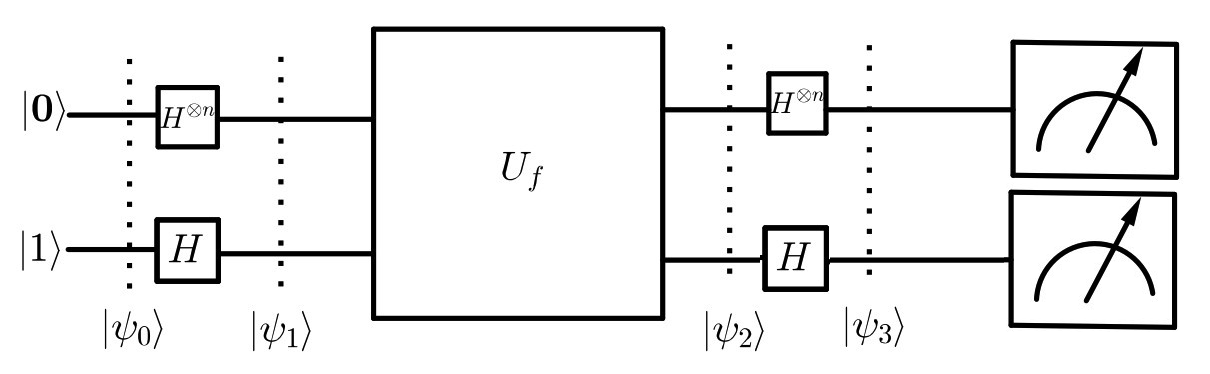

Let's follow what our circuit does at each step: 
- Initially, our state is $\ket{\psi_0} = \ket{00...0} \ket{1} $. 
- After applying Hadamard gates, the state becomes $\ket{\psi_1} = \frac{1}{\sqrt{2^n}}\sum_{\textbf{x}\in \{0,1\}^n } \ket{ \textbf{x} } \ket{-}  $.
- After applying $U_f$, $(-1)^{ f(\textbf{x}) }$ coefficient will be added to each term. That is, the state will be $\ket{\psi_2} = \frac{1}{\sqrt{2^n}}\sum_{\textbf{x}\in \{0,1\}^n } (-1)^{f(\textbf{x})} \ket{ \textbf{x} } \ket{-}  $.
- Now, the crucial step is in the last Hadamard sequence. Firstly, it is quite easy to see that when we apply a Hadamard gate to the ancilla qubit it will just return to $\ket{1}$ state. At the moment of measurement, the value of ancilla qubit will be of no interest to us, so we would like it to be in some sort of definite state. Now, let's focus our attention to what a Hadamard transformation does to a given state. For any $\ket{x}$, where $ x \in \{0,1\}$, Hadamard transformation performs the following mapping $$\begin{align} H\ket{x} &= \frac{1}{\sqrt{2}} \bigg( \ket{0} + (-1)^x \ket{1} \bigg) \\ &= \frac{1}{\sqrt{2}} \sum_{ z \in \{0,1\} } (-1)^{x \cdot y } \ket{z}\end{align}$$ If we generalize this to n qubits, we can write the Hadamard transformation of a bit string $\textbf{x}$ as $$ H^{\otimes n} \ket{ \textbf{x} } = \frac{1}{\sqrt{2^n}} \sum_{ z \in \{0, 1\}^n } (-1)^{ \textbf{x.z} } \ket{ z } $$ Utilizing this equation, we can write:  $$ \begin{align}\ket{ \psi_3 } &= \bigg( \frac{1}{\sqrt{2^n}} \sum_{ \textbf{x} \in \{0,1\}^n } (-1)^{f( \textbf{x} )} \frac{1}{\sqrt{2^n}} \sum_{  \textbf{z} \in \{0, 1\}^n} (-1)^{\textbf{x.z}} \ket{ \textbf{z}} \bigg) \ket{-} \\ &= \frac{1}{2^n}  \sum_{ \textbf{z} \in \{0, 1\}^n} \bigg( \sum_{ \textbf{x} \in \{0,1\}^n } (-1)^{f( \textbf{x} ) + \textbf{x.z} } \ket{ \textbf{z} } \bigg) \ket{-}\end{align} $$ Now, this equation seems a little confusing but we will be focusing on only one of the coefficients, the coefficient when $\ket{ \textbf{z} } = \ket{0}^{\otimes n} $. In this case, $\textbf{x.z} $ term will be zero, so we will only have the following amplitude term $$ \frac{1}{2^n} \sum_{ \textbf{x} \in \{0, 1\}^n } (-1)^{f(\textbf{x})} $$         There are two cases, either f is constant or balanced. If f is constant, then $f(\textbf{x})$ will either be 0 or 1, by definition. If it is 0 then the term $ \sum_{ \textbf{x} \in \{0, 1\}^n } (-1)^{f(\textbf{x})}$ will be $2^n$ since there are that many possible bit strings. In this case the coefficient of $\ket{0}^{\otimes n}$ will just be 1. If f is 1 for all $\textbf{x}$, then it is easy to see that the coefficient term will just be -1. So if the function f is constant, the only term left will be $\ket{0}^{\otimes n}$, somehow all the other terms will destructively interfere with each other. However, if f is balanced, then the term  $ \sum_{ \textbf{x} \in \{0, 1\}^n } (-1)^{f(\textbf{x})} $ will just be zero, since half of the terms will be +1, when $f(\textbf{x})=0$, and the other half will be -1, when $f(\textbf{x})=1$, again by definition. 

<h3> Task 2 </h3> 

You are given an oracle function called `oracle(x)`, which takes as input a quantum circuit, applies $U_f$ on it and returns the circuit. ( burda donmesine gerek var mi yok mu bilmiyorum. Ona sen karar ver nasil daha rahat olursa sana. ) 

Implement the proposed algorithm to decide whether or not your oracle function is constant or even. You should be able the see the circuit structure of $U_f$, if you draw your circuit. Can you check whether your result is correct or not by looking at this circuit ?

Gene ayni muhabbet. 4 qubit yapsan randomized bir sekilde gayet yeterli olur bence.